In [ ]:
import bandit as b
import algorithms as algo 
import functions as fun
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [42]:
instance1 = [[0.65, 0.7, 0.8, 0.6, 0.75], [0.35, 0.4, 0.5, 0.3, 0.45], [0.25, 0.3, 0.4, 0.2, 0.35],
         [0.25, 0.3, 0.4, 0.2, 0.35], [0.25, 0.3, 0.4, 0.2, 0.35]]

instance2 = [[0.65, 0.7, 0.8, 0.6, 0.75], [0.55, 0.6, 0.7, 0.5, 0.65], [0.25, 0.3, 0.4, 0.2, 0.35],
         [0.25, 0.3, 0.4, 0.2, 0.35], [0.25, 0.3, 0.4, 0.2, 0.35]]

d = [instance1, instance2]
T = 10000
runs = 5


#Results from Section 3

In [ ]:

results = []

for data in d:
    bandit = b.BernoulliBandit(data)
    data_rep = []
    for i in range(len(data)):
        data_rep.append([0] * len(data[i]))

    max_kl = algo.TwolevelKLUCB(data_rep, 'max', bandit)
    result_max = fun.run_experiment(max_kl, data_rep, runs, T, 0)

    min_kl = algo.TwolevelKLUCB(data_rep, 'min', bandit)
    result_min = fun.run_experiment(min_kl, data_rep, runs, T, 1)

    avg_kl = algo.TwolevelKLUCB(data_rep, 'avg', bandit)
    result_avg = fun.run_experiment(avg_kl, data_rep, runs, T, 2)

    kl = algo.KLUCB(data, bandit)
    result_kl = fun.run_experiment(kl, data_rep, runs, T, 3)

    twol_ts = algo.TwolevelTS(data, bandit)
    result_twolts = fun.run_experiment(twol_ts, data_rep, runs, T, 4)

    ts = algo.TS(data_rep, bandit)
    result_ts = fun.run_experiment(ts, data_rep, runs, T, 5)
    results.append([result_max, result_min, result_avg, result_kl, result_twolts, result_ts])


In [34]:
mpl.style.use('ggplot')
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:red']
labels = ['2-level KL-UCB max', '2-level KL-UCB min', '2-level KL-UCB avg', 'KL-UCB', '2-level TS', 'TS']

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[0]

for i in range(len(result)):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .13, .55, .15, .15
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0, 5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(instance1)):
    ax2.plot(x_d[i], np.sort(instance1[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()


fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[1]

for i in range(len(result)):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .13, .55, .15, .15
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(instance2)):
    ax2.plot(x_d[i], np.sort(instance2[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()

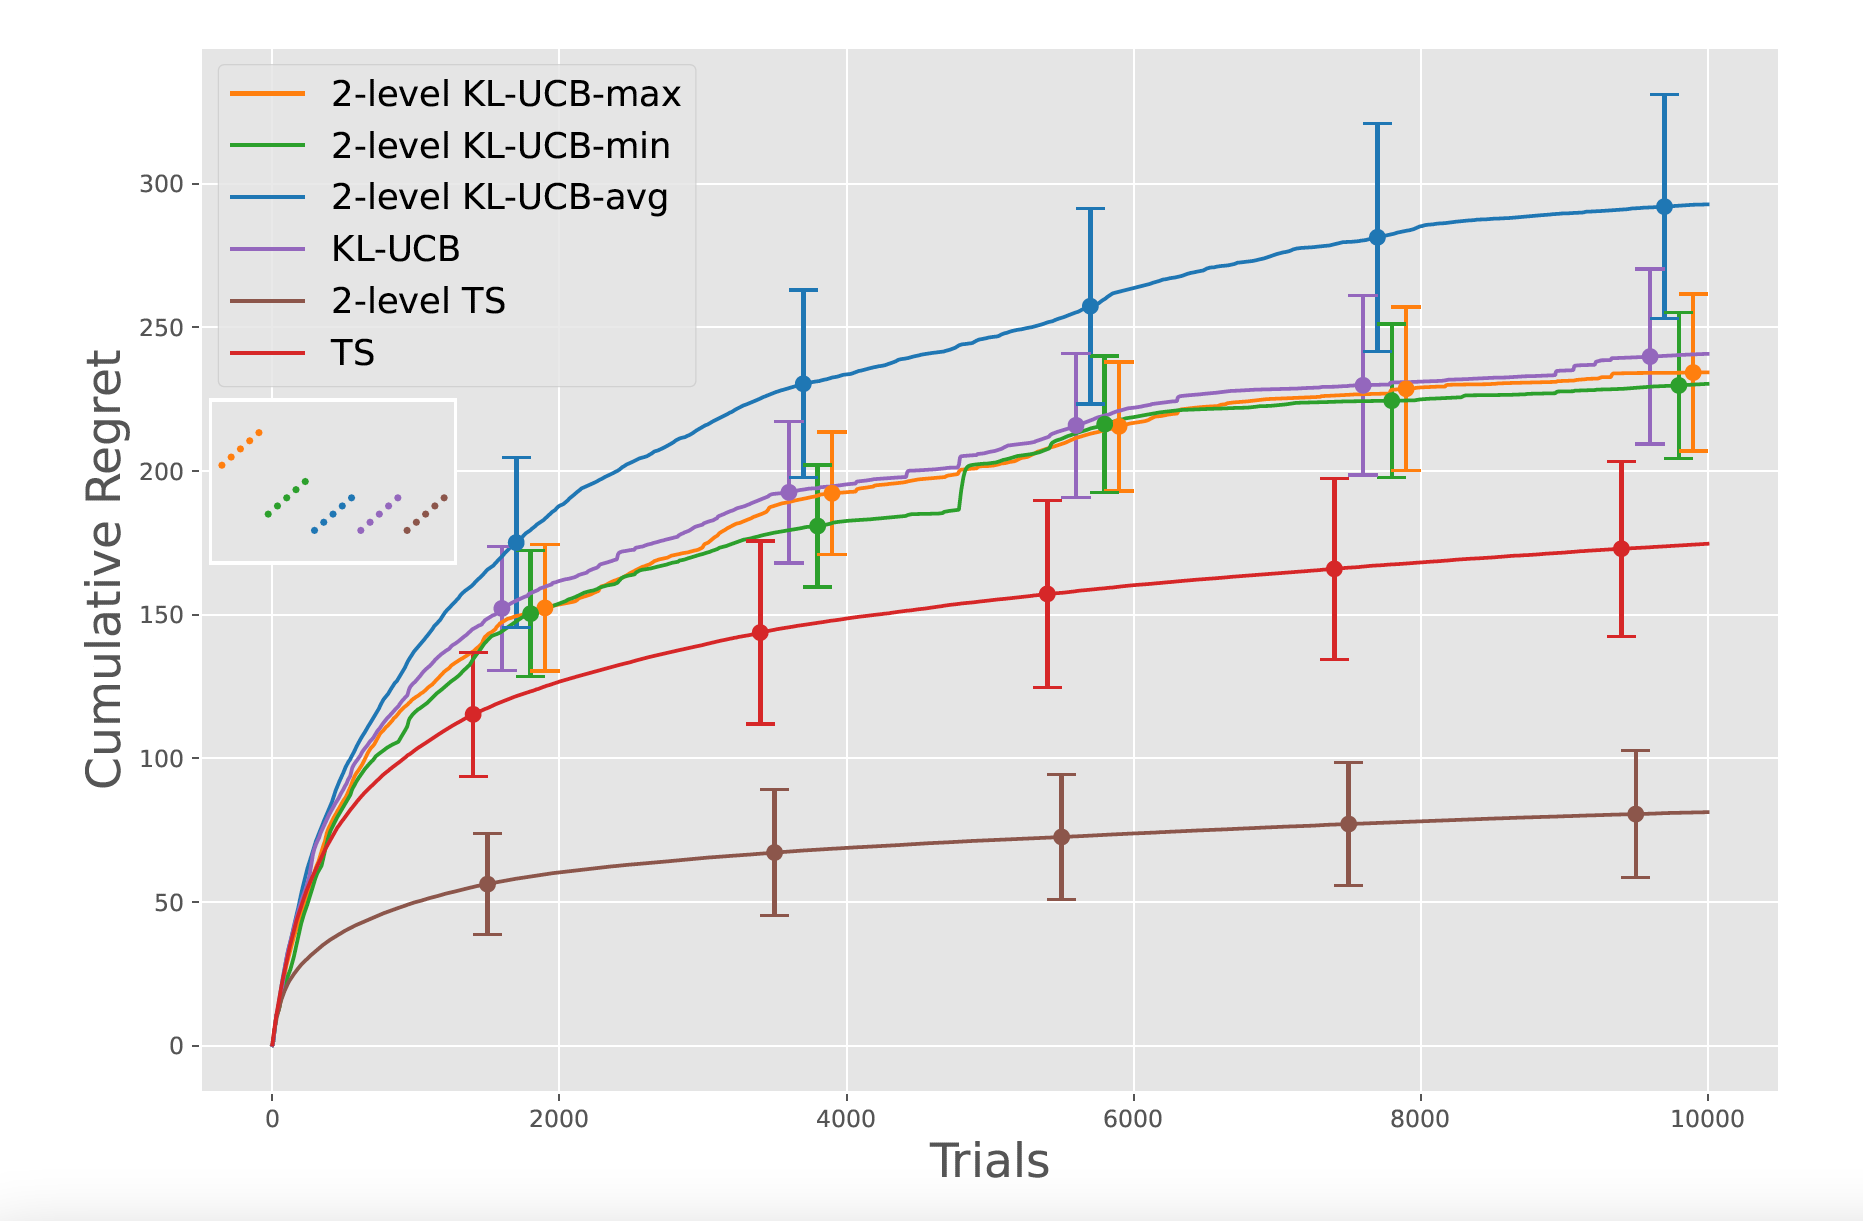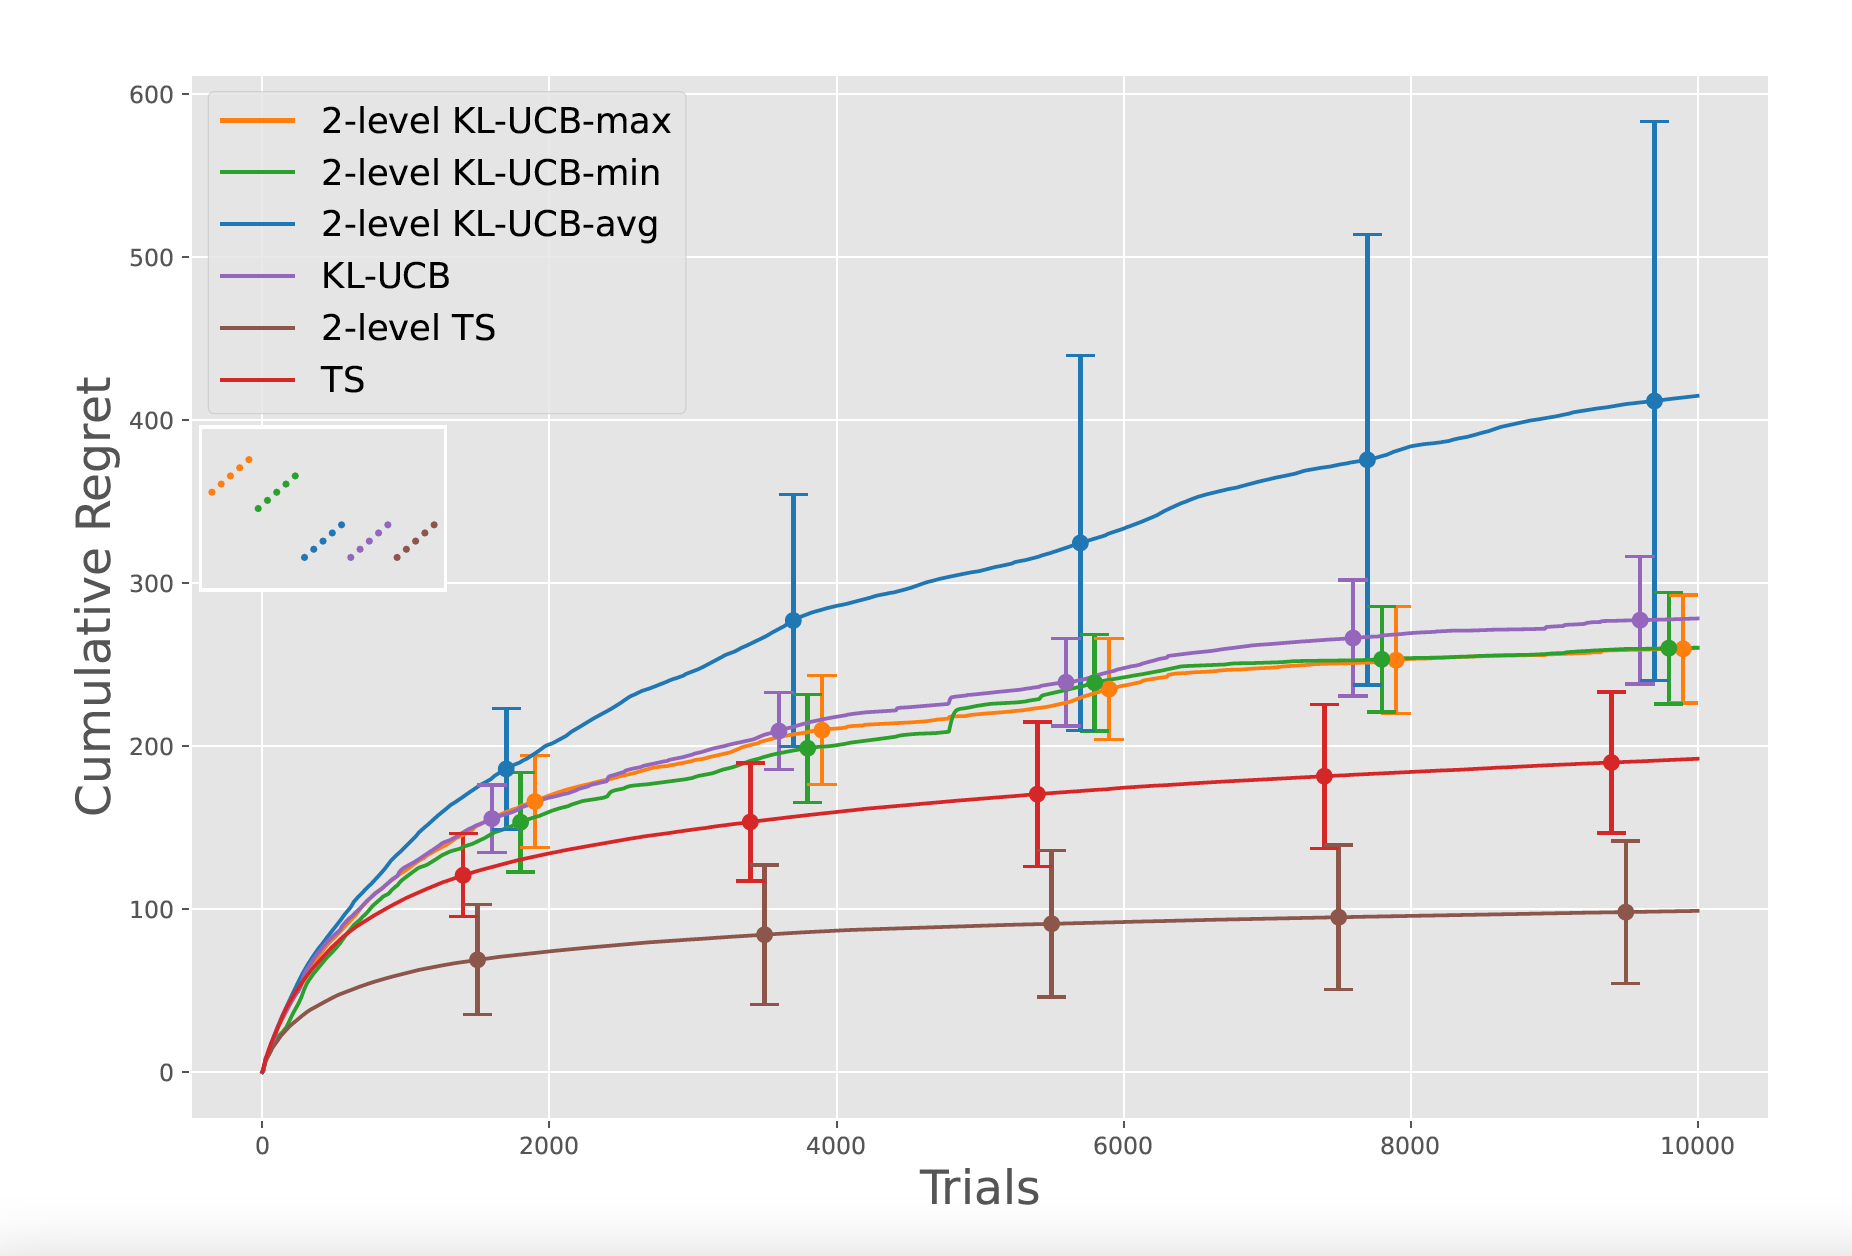

# Results from Section 4

In [ ]:
results = []

for data in d:
    bandit = b.BernoulliBandit(data)
    data_rep = []
    for i in range(len(data)):
        data_rep.append([0] * len(data[i]))

    overlap = fun.get_overlap(data)

    max_kl = algo.c_KLUCB(data_rep, 'max', overlap, bandit)
    result_max = fun.run_experiment(max_kl, data_rep, runs, T, 0)
    
    min_kl = algo.c_KLUCB(data_rep, 'min', overlap, bandit)
    result_min = fun.run_experiment(min_kl, data_rep, runs, T, 1)
    
    rand_kl = algo.c_KLUCB(data_rep, 'avg', overlap, bandit)
    result_rand = fun.run_experiment(rand_kl, data_rep, runs, T, 2)
    
    kl = algo.KLUCB(data, bandit)
    result_kl = fun.run_experiment(kl, data_rep, runs, T, 3)

    results.append([result_max, result_min, result_rand, result_kl])

In [ ]:
labels = ['Cluster KL-UCB max', 'Cluster KL-UCB min', 'Cluster KL-UCB rand', 'KL-UCB']


fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[0]

for i in range(len(result)):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .71, .12, .18, .18
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(5):
    ax2.plot(x_d[i], np.sort(instance1[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()


fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[1]

for i in range(len(result)):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .71, .12, .18, .18
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(instance1)):
    ax2.plot(x_d[i], np.sort(instance1[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()


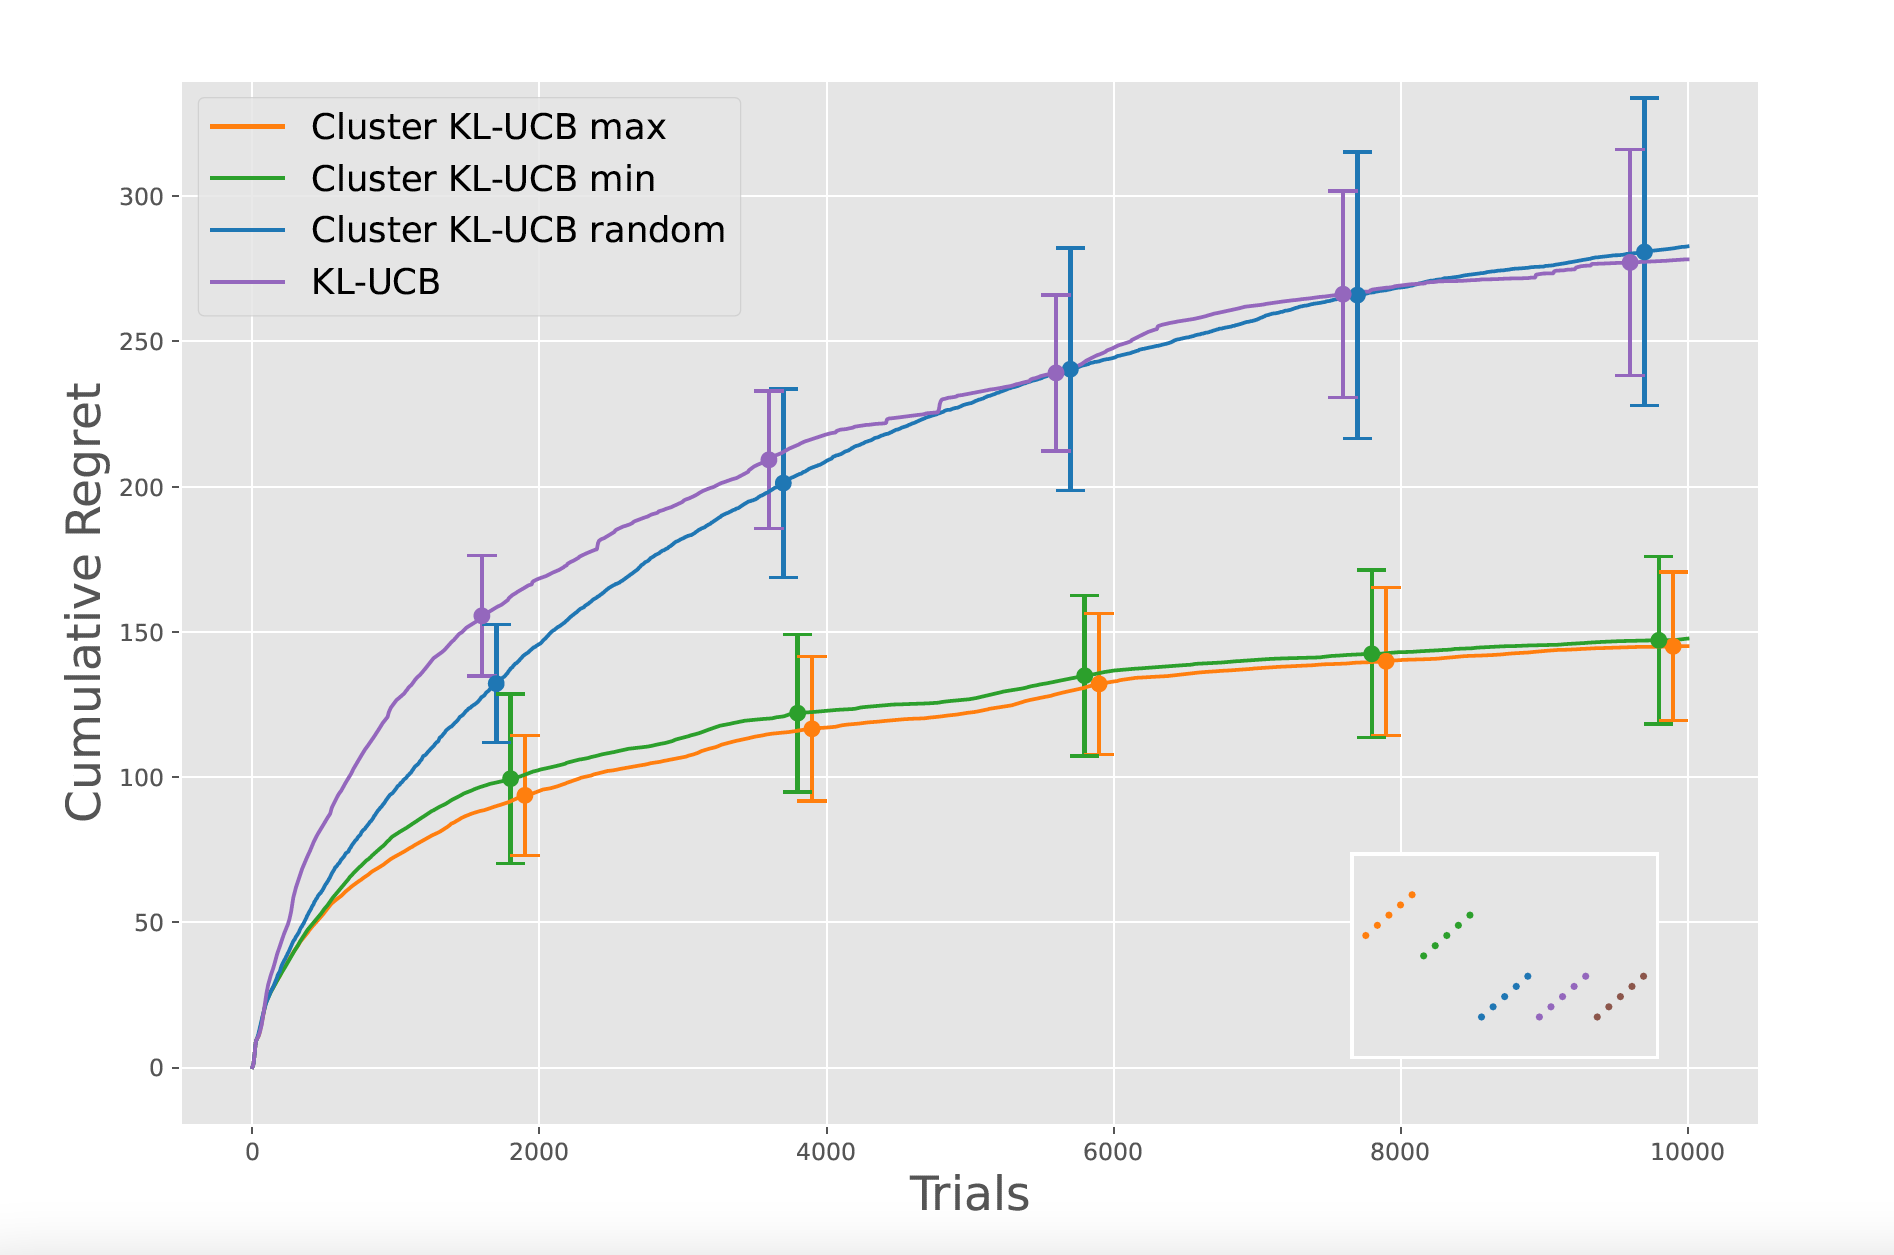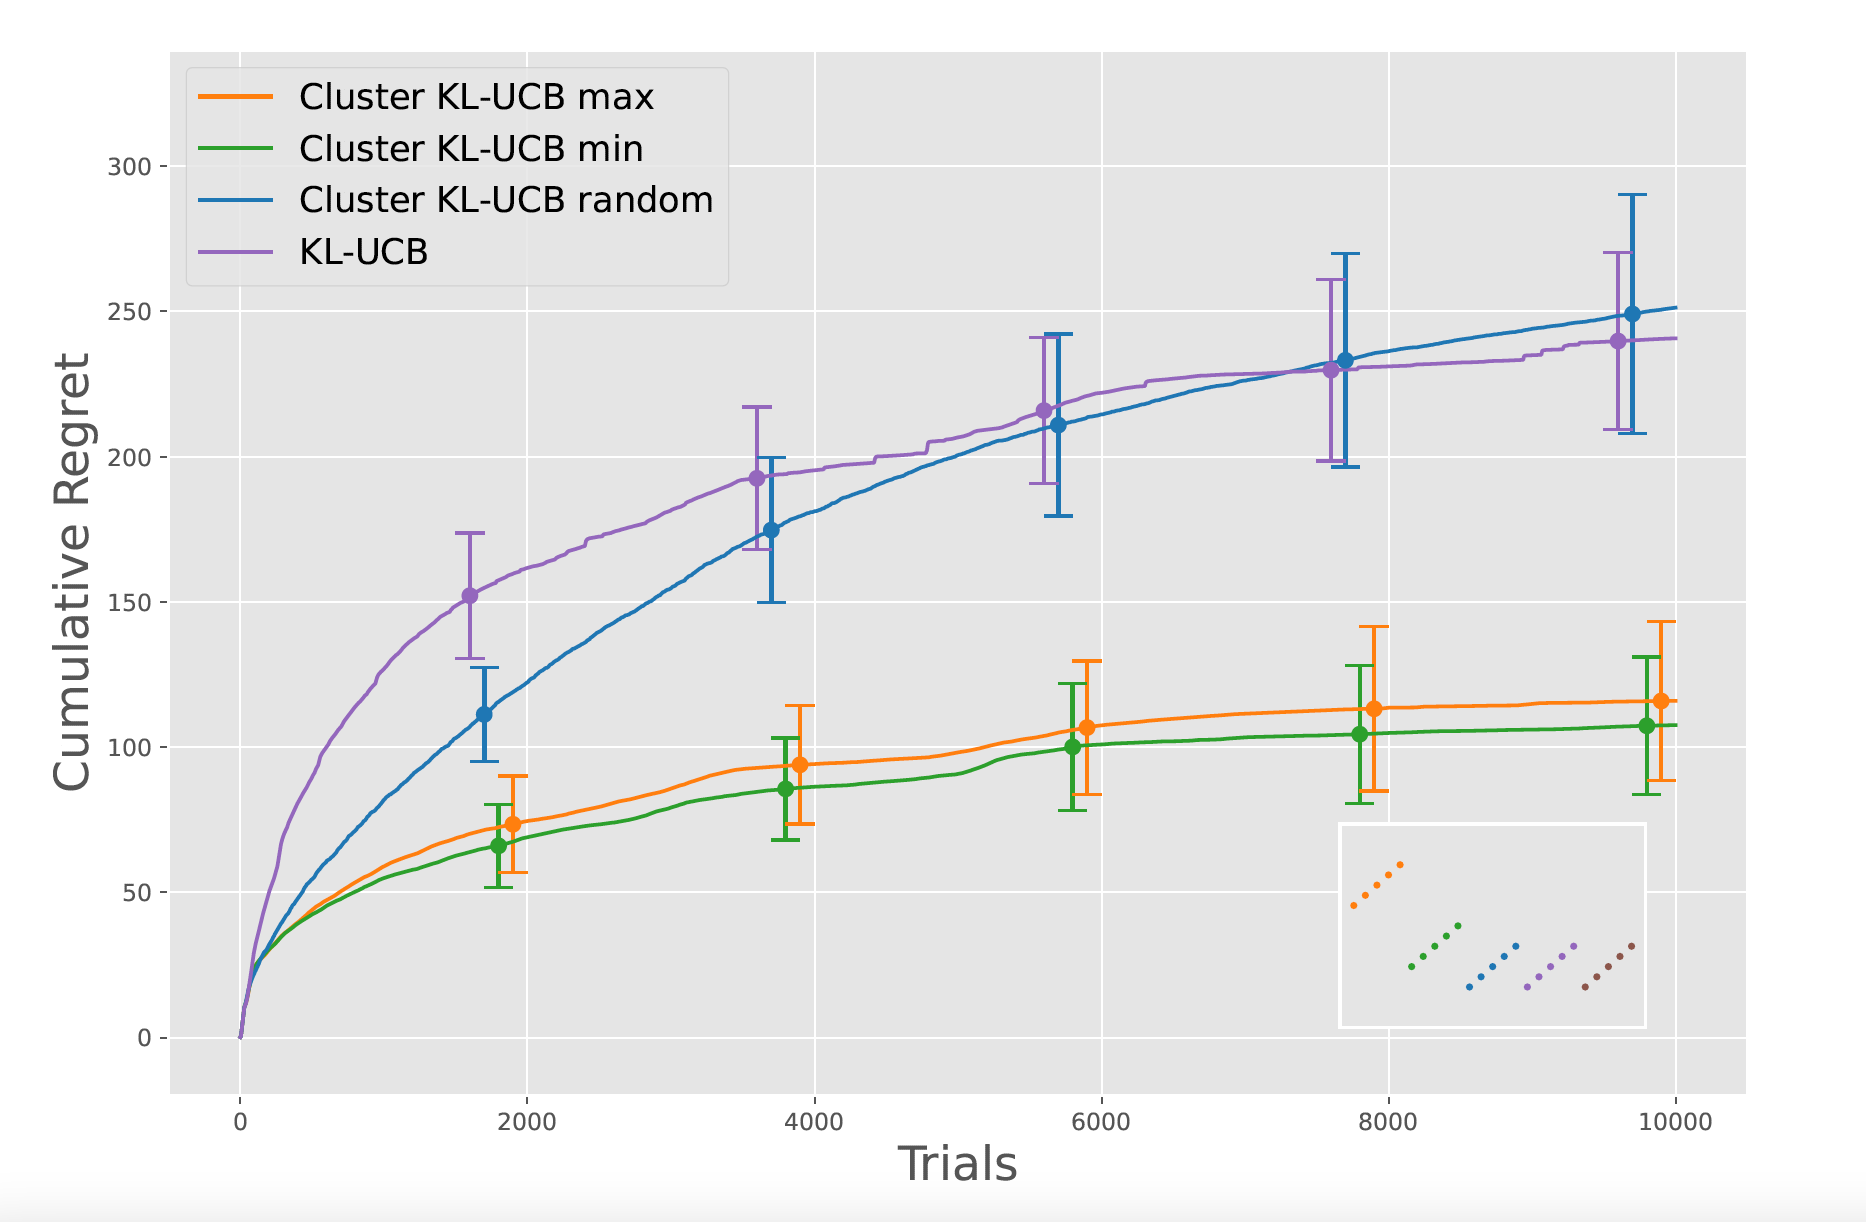

### Comparing Cluster KL-UCB max and min

In [ ]:
data1 = [[0.6, 0.8, 0.7], [0.58, 0.78, 0.68]] #overlap = 90 %
data2 = [[0.6, 0.8, 0.7], [0.55, 0.75, 0.65]] #overlap = 75 %
data3 = [[0.6, 0.8, 0.7], [0.5, 0.7, 0.6]] #overlap = 50 %
data4 = [[0.6, 0.8, 0.7], [0.45, 0.65, 0.55]] # overlap = 25%
data5 = [[0.6, 0.8, 0.7],[0.4, 0.6, 0.5]] #overlap = 0%
data6 = [[0.6, 0.8, 0.7], [0.35, 0.55, 0.45]] #overlap = - 25%
data7 = [[0.6, 0.8, 0.7], [0.3, 0.5, 0.4]] # overlap = - 50%
data8 = [[0.6, 0.8, 0.7], [0.25, 0.45, 0.35]] # overlap = - 75%
data9 = [[0.6, 0.8, 0.7], [0.22, 0.42, 0.32]] # overlap = - 90 %

d = [data1, data2, data3, data4, data5, data6, data7, data8, data9]

results = []

for data in d:
    bandit = b.BernoulliBandit(data)
    data_rep = []
    for i in range(len(data)):
        data_rep.append([0] * len(data[i]))

    max_kl = algo.c_KLUCB(data_rep, 'max', bandit)
    result_max = fun.run_experiment(max_kl, data_rep, runs, T, 0)
    
    min_kl = algo.c_KLUCB(data_rep, 'min', bandit)
    result_min = fun.run_experiment(min_kl, data_rep, runs, T, 1)
    
    results.append([[results_max[0][-1], results_max[1][-1]], [results_min[0][-1], results_min[1][-1]])


In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[1]

for i in range(2):
    ax1.plot([results[j][i][0] for j in range(len(results))], label=labels[i], color=colors[i])
    ax1.errorbar(x, [result[j][i][0] for j in range(len(results))], yerr=[results[j][i][1] for j in range(len(results))], fmt='o', capsize=6,
                 color=colors[i])

plt.xticks(x, labels=['90%', '75%', '50%', '25%', '0%', '-25%', '-50%', '-75%', '-90%'])
names = ['90%', '75%', '50%', '25%', '0%', '-25%', '-50%', '-75%', '-90%']
l, b, h, w = .64, .55, .25, .25
ax2 = fig.add_axes([l, b, w, h])
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:red', 'tab:pink', 'tab:olive',
          'tab:cyan']
ax2.plot(0, 0.8, '_', color='tab:gray', ms=10, mew=0.8)
ax2.plot([0, 0], [0.6 + 0.001, 0.8 - 0.001], '-', color='tab:gray', lw=1)
ax2.plot(0, 0.6, '_', color='tab:gray', ms=10, mew=0.8)
for i in range(8):
    ax2.plot(0.5 + 0.2*i, d[i][1], "_", color=colors[i], ms=10, mew=0.8)
    ax2.plot([0.5 + 0.2*i, 0.5 + 0.2*i], [d[i][0], d[i][1]], '-', color=colors[i], label=names[i], lw=1)
    ax2.plot(0.5 + 0.2*i, d[i][0], '_', color=colors[i], ms=10, mew=0.8)

ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

ax1.legend(loc='upper right')
ax2.set_ylim(0, 1)
ax2.set_xlim(-0.5, 2)
ax1.set_xlabel("Overlap", fontsize=15)

ax1.set_ylabel("Cumulative Regret", fontsize=15)
plt.show()

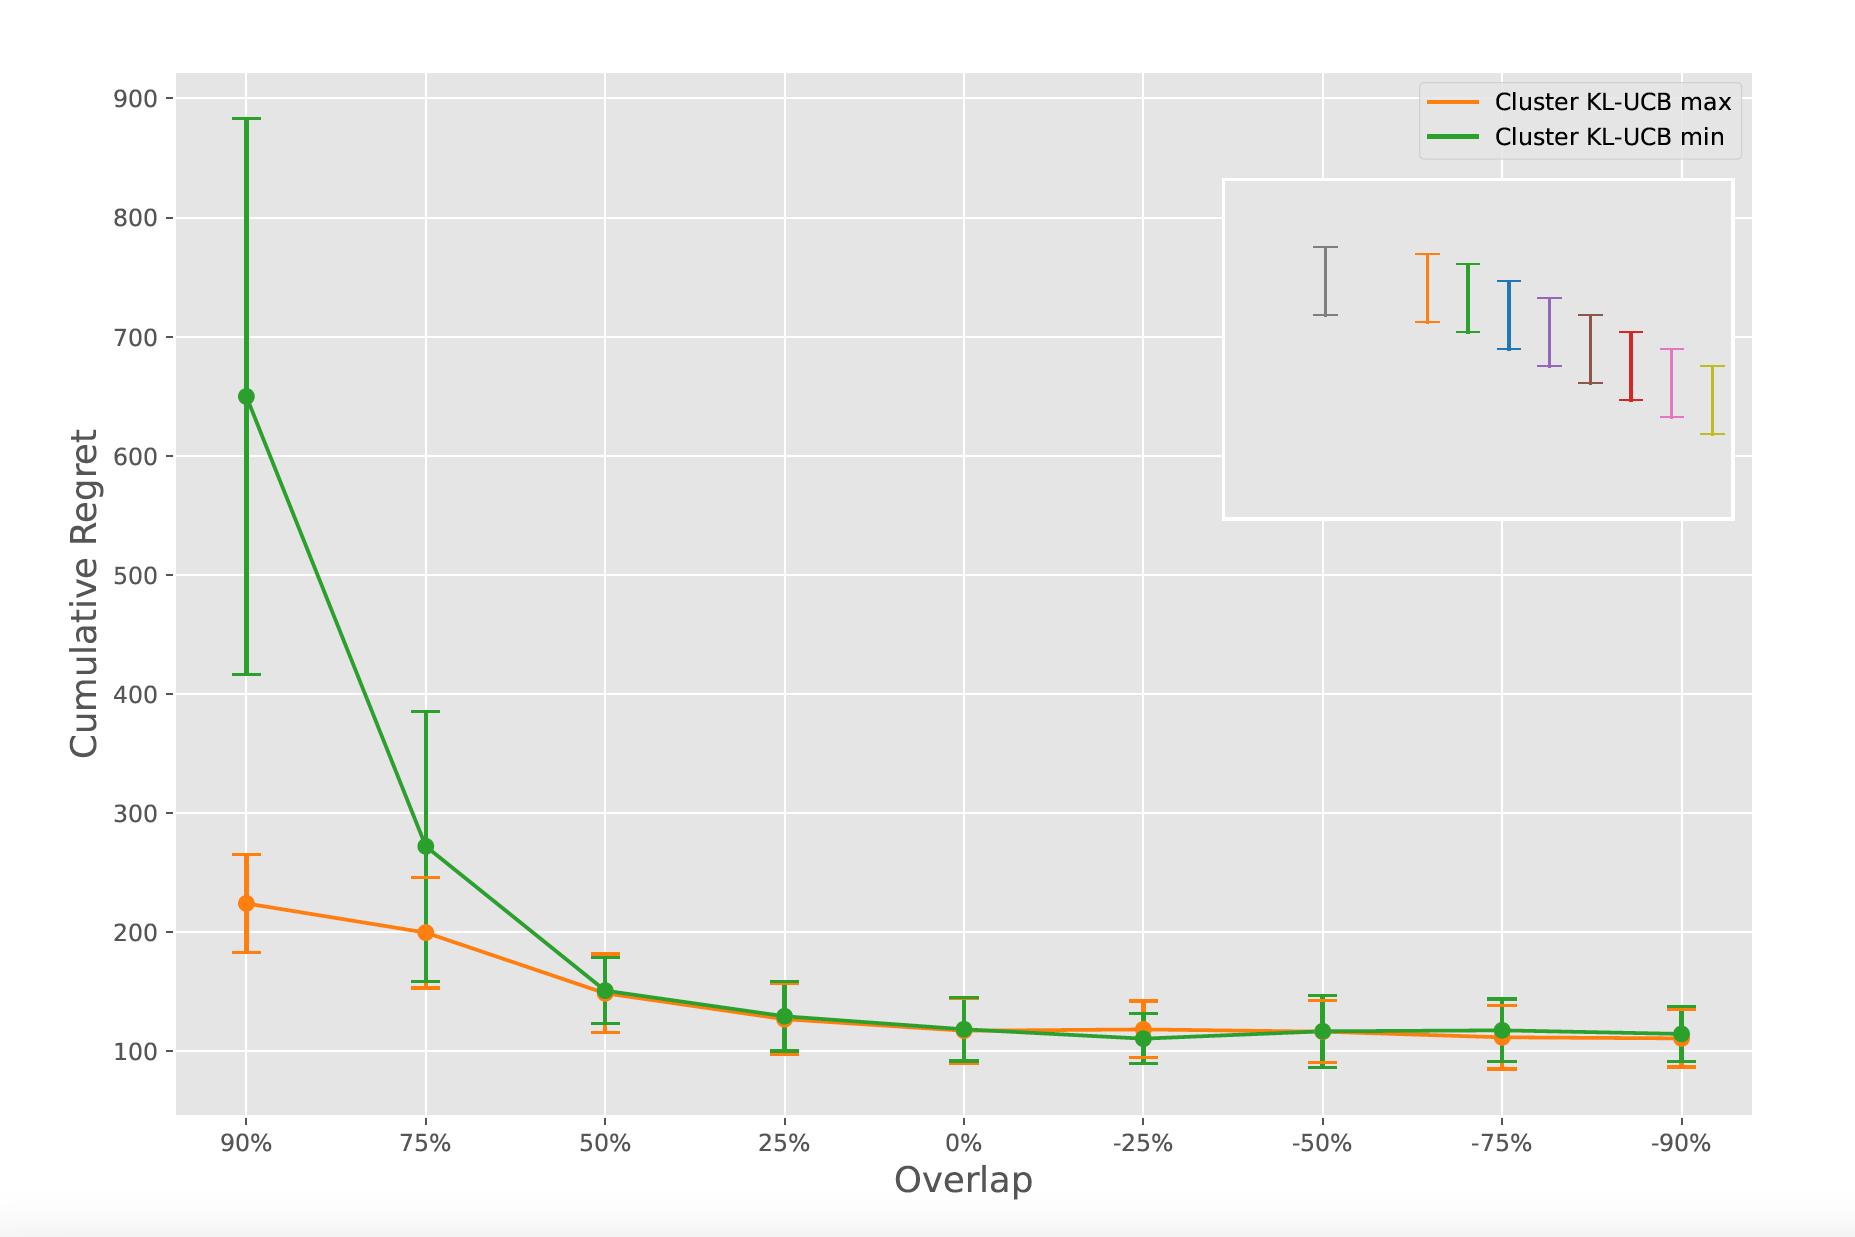

# Results from Section 6

In [ ]:
data1 = [[0.65, 0.7, 0.8, 0.6, 0.75], [0.6, 0.65, 0.75, 0.55, 0.7], [0.25, 0.3, 0.4, 0.2, 0.35],
       [0.25, 0.3, 0.4, 0.2, 0.35], [0.25, 0.3, 0.4, 0.2, 0.35]] # 75%
data2 = [[0.65, 0.7, 0.8, 0.6, 0.75], [0.5, 0.55, 0.65, 0.45, 0.6], [0.25, 0.3, 0.4, 0.2, 0.35],
       [0.25, 0.3, 0.4, 0.2, 0.35], [0.25, 0.3, 0.4, 0.2, 0.35]] #25%
data3 = [[0.65, 0.7, 0.8, 0.6, 0.75], [0.4, 0.45, 0.55, 0.35, 0.5], [0.25, 0.3, 0.4, 0.2, 0.35],
        [0.25, 0.3, 0.4, 0.2, 0.35], [0.25, 0.3, 0.4, 0.2, 0.35]] # -25%

d = [data1, data2, data3]

results = []

for data in d:
    bandit = b.BernoulliBandit(data)
    data_rep = []
    for i in range(len(data)):
        data_rep.append([0] * len(data[i]))

    overlap = fun.get_overlap(data)

    ckl = algo.c_KLUCB(data_rep, 'max', overlap, bandit)
    result_ckl = fun.run_experiment(ckl, data_rep, runs, T, 0)

    kl = algo.KLUCB(data, bandit)
    result_kl = fun.run_experiment(kl, data_rep, runs, T, 1)

    results.append([result_ckl, result_kl])


In [ ]:
labels = ['Cluster KL-UCB', 'KL-UCB']

####

fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[0]

for i in range(2):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .71, .12, .18, .18
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(data1)):
    ax2.plot(x_d[i], np.sort(data1[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()


fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[1]

for i in range(2):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .71, .12, .18, .18
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(data2)):
    ax2.plot(x_d[i], np.sort(data2[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()


fig, ax1 = plt.subplots(figsize=(12, 8))
result = results[2]

for i in range(2):
    ax1.plot(result[i][0], label=labels[i], color=colors[i])
    ax1.errorbar([j for j in result[i][2]], [result[i][0][j] for j in result[i][2]], yerr=result[i][1], fmt='o', capsize=6,
                 color=colors[i])

l, b, h, w = .71, .12, .18, .18
ax2 = fig.add_axes([l, b, w, h])

x_d = [np.arange(0,5), np.arange(5, 10), np.arange(10, 15), np.arange(15, 20), np.arange(20, 25)]
for i in range(len(data3)):
    ax2.plot(x_d[i], np.sort(data3[i]), 'o', color=colors[i], ms=2)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax1.legend(loc='upper left', fontsize=15)
ax2.set_ylim(0,1)
ax1.set_xlabel("Trials", size=20)
ax1.set_ylabel("Cumulative Regret", size=20)

plt.show()

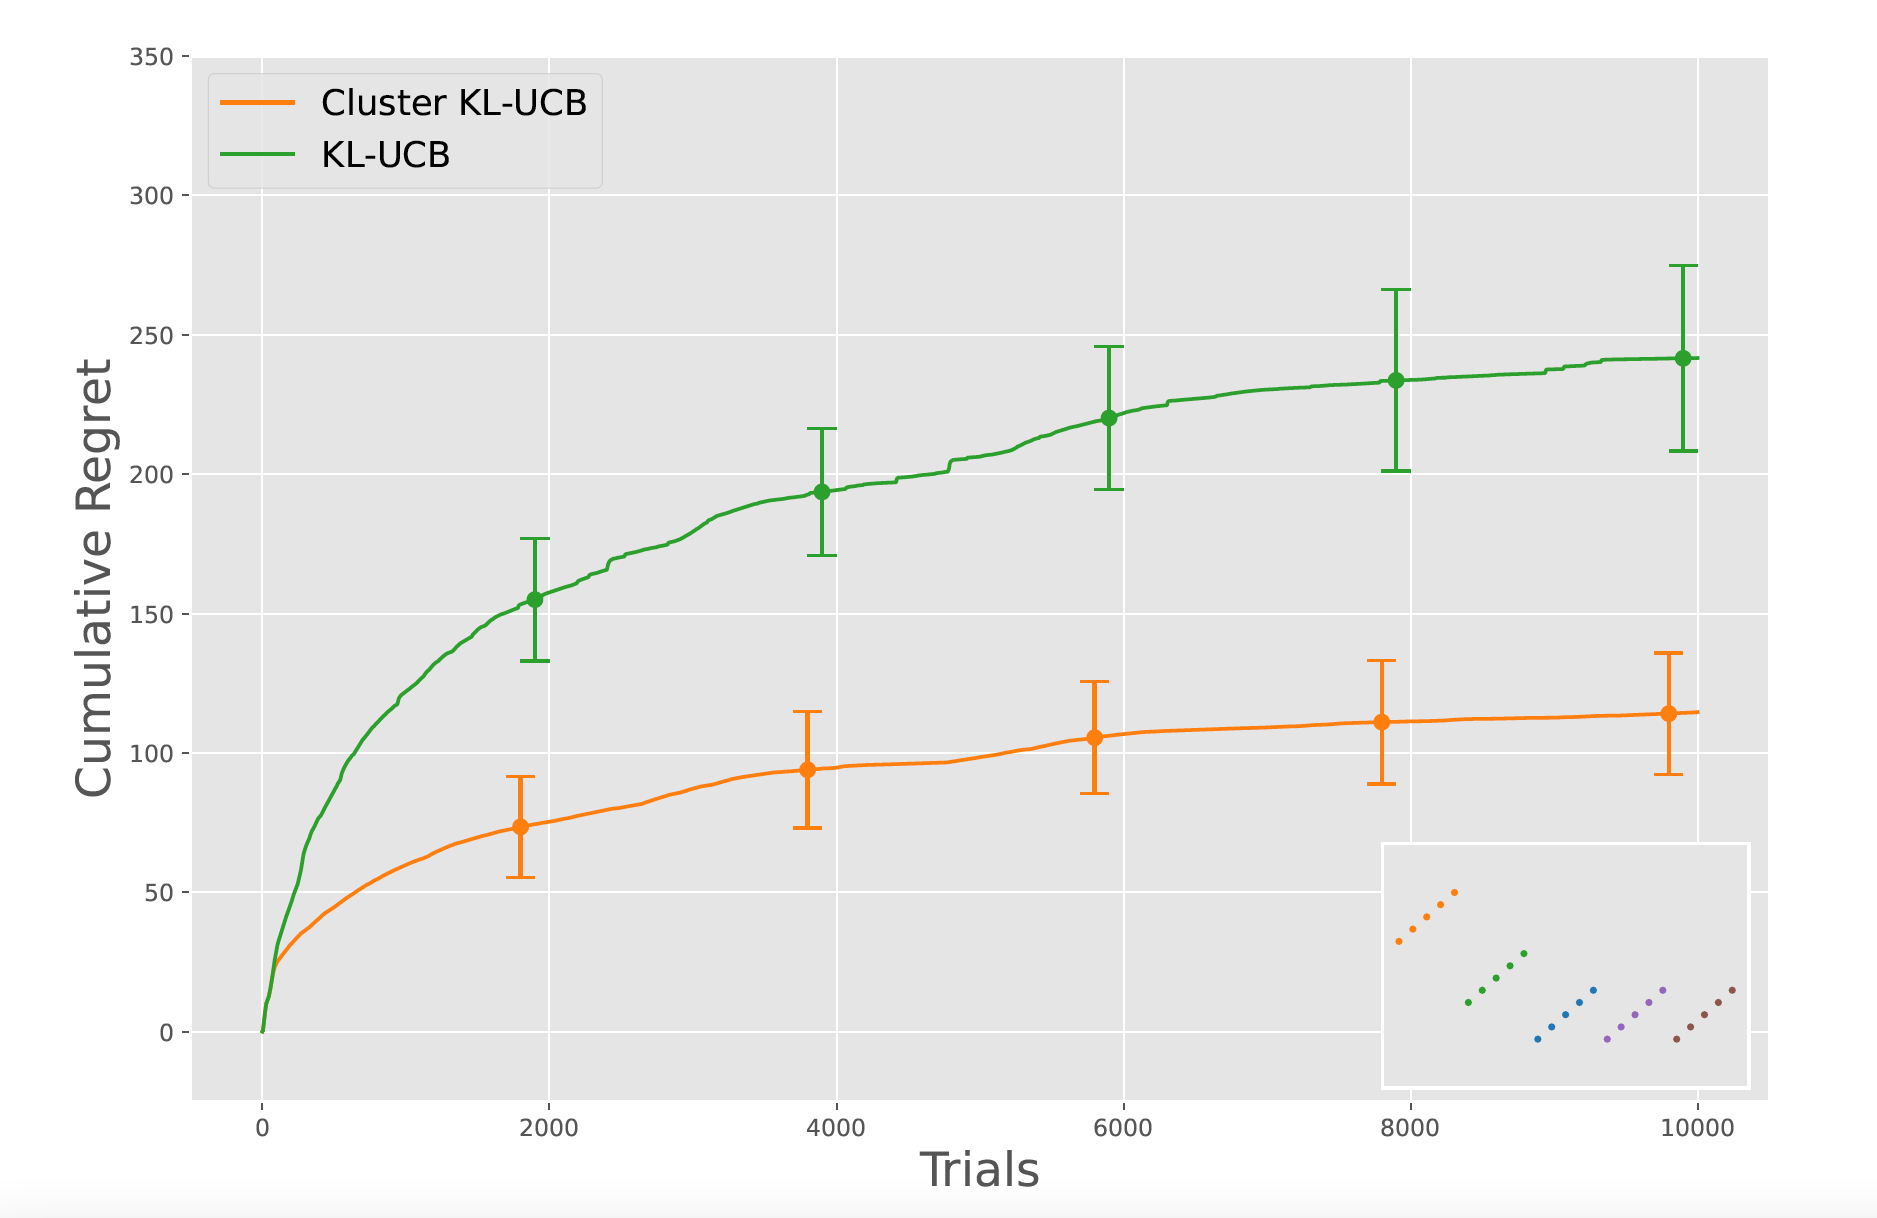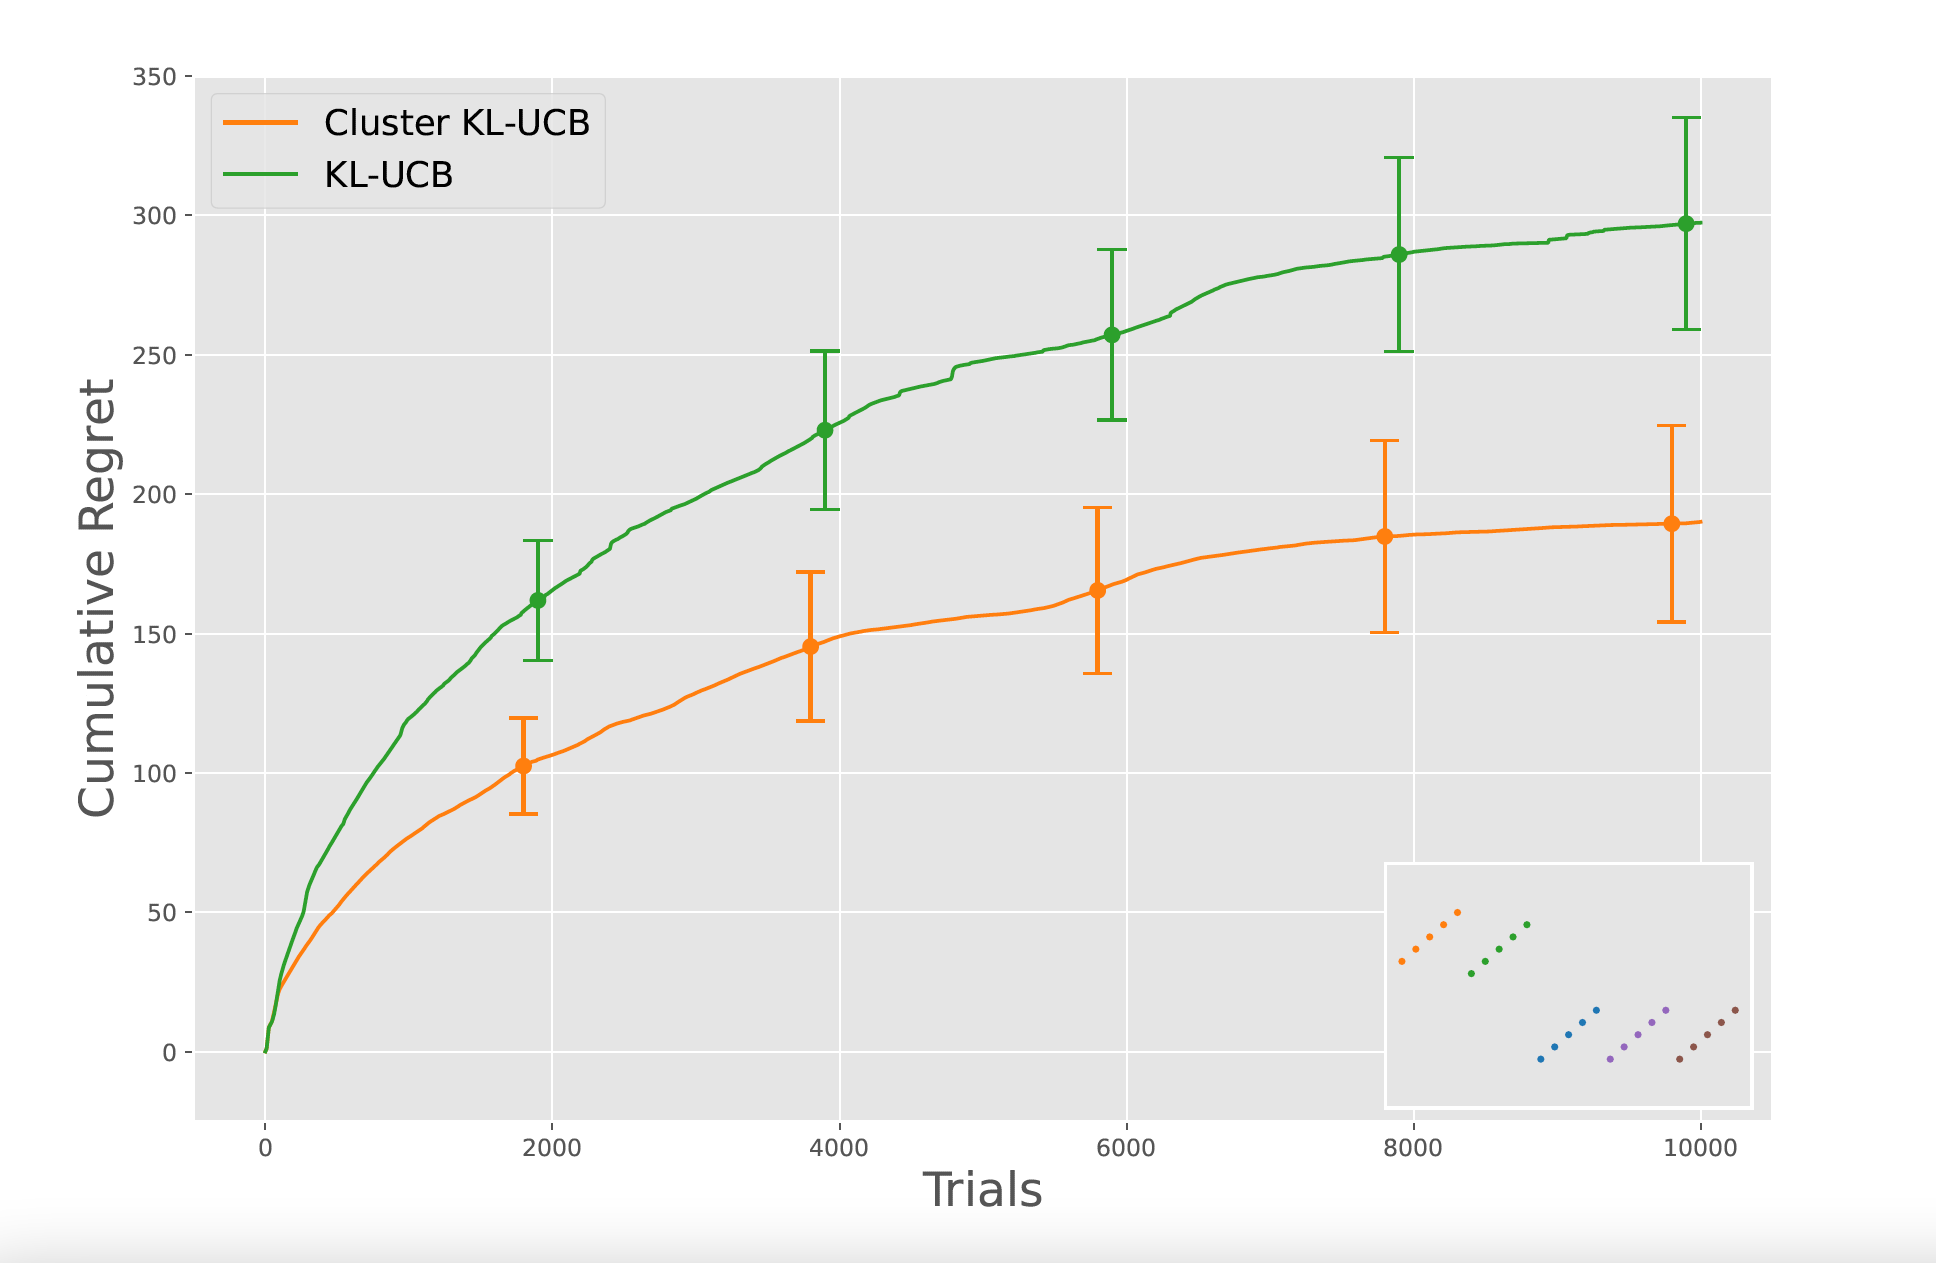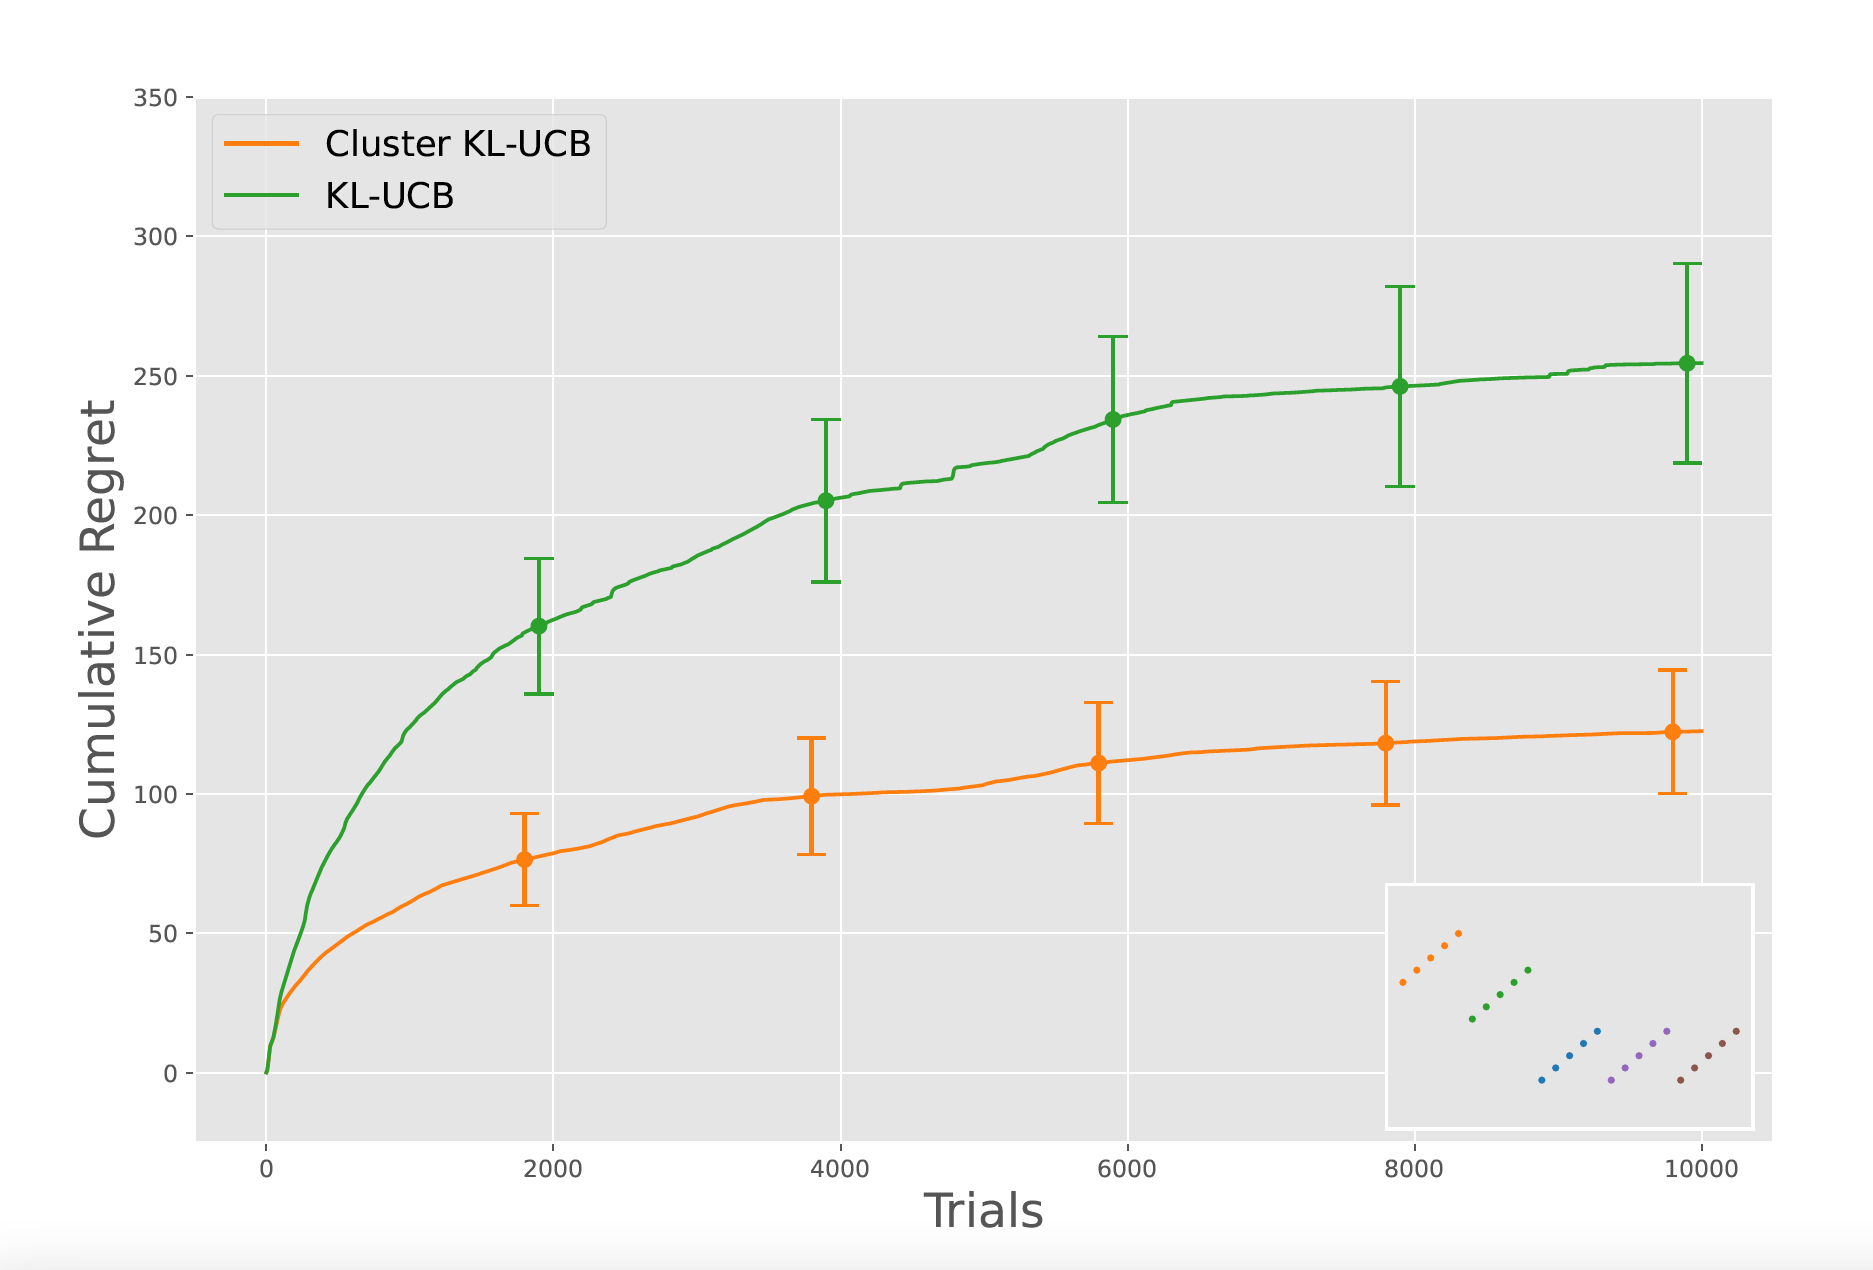